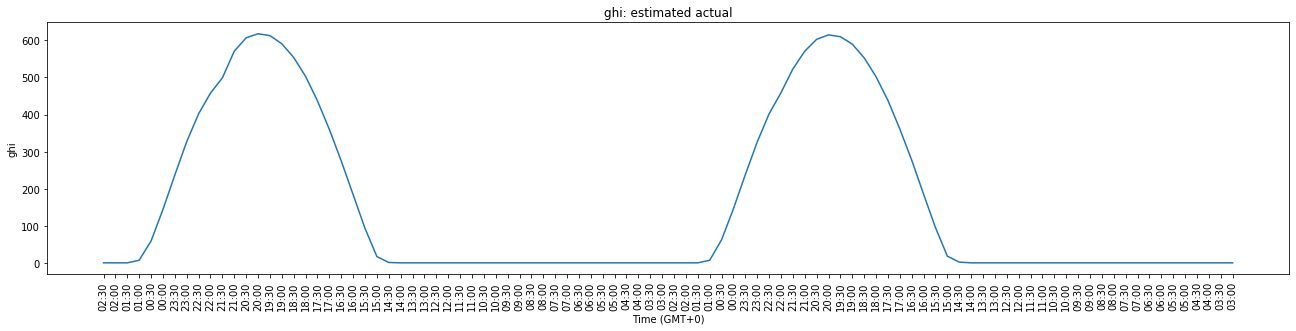

In [24]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
api_base = 'https://api.solcast.com.au'

solcast_api_key =  "U7mG4zUHGW3gczhlcZslxE2QiWDOTGJl"
#api_key = "U7mG4zUHGW3gczhlcZslxE2QiWDOTGJl"

statuscode = 0

# Accessing SolCast API for  World Solar radiation Data at point Content should include estimated actuals

def world_sol_radiation_data_api():

  response = requests.get(

                "https://api.solcast.com.au/world_radiation/estimated_actuals.json",
                params = {
                    'api_key':solcast_api_key,
                    'latitude':33.895,
                     'longitude': -118.308}
                     ) # Specify Longitude, langitude


  statuscode = response.status_code
  api_content = response.json()
  #print(statuscode)
  #print(response.content)
  return api_content

# Accessing Solcast API for Rooftop Sites at point Content should include estimated actuals

def rooftop_sites():

  response = requests.get(
       "https://api.solcast.com.au/rooftop_sites/{a6b0-f9cc-4e61-89c5}/estimated_actuals.json",
       params = {
           'api_key': solcast_api_key,
           'latitude':33.895,
           'longitude': -118.308,
           'capacity': 5,
           'tilt': 23,
           'azimuth' : 0,
           'loss_factor' : 0.9
           })
  statuscode = response.status_code
  api_content = response.json()
  #print(statuscode)
  #print(response.content)
  return api_content

def world_pv_power():

   response = requests.get(

   )

# get data from api
raw_world_data = world_sol_radiation_data_api()['estimated_actuals']
raw_rooftop_data = rooftop_sites()['estimated_actuals']

# convert json data into dictionary readable by panda - bring over to main branch
def convert_data(raw_data):
    data = {}
    # initialize key-value pairs as empty lists
    for variable in raw_data[0]:
        data[variable] = []
    # restructure raw data into dictionary with variable labels as keys and data as values
    for i in range(len(raw_data)):
        for variable in raw_data[i]:
            list = data[variable]
            list.append(raw_data[i][variable])
    # construct dataframe
    df = pd.DataFrame.from_dict(data)
    return df

world_df = convert_data(raw_world_data)
rooftop_df = convert_data(raw_rooftop_data)

# create a list of times from 'period_end' - these will be our axis labels
def time_labels(data_frame):
    times = []
    for i in range(len(data_frame)):
        date_time = data_frame['period_end'][i]
        #print(i)
        time = date_time[11:16]
        #print(time)
        times.append(time)
    return times

world_df['period_end_time'] = time_labels(world_df)

# plot world_df as lineplot
plt.plot('period_end','ghi', data=world_df)
plt.title('ghi: estimated actual')
plt.xlabel('Time (GMT+0)')
plt.ylabel('ghi')
plt.xticks(world_df['period_end'], world_df['period_end_time'], rotation = 'vertical')
plt.subplots_adjust(right=3, top = 1)
plt.show()
